In [1]:
import warnings
warnings.filterwarnings(action="ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline

# Importing and Visualizing the data

In [2]:
from tensorflow.keras.datasets import mnist

2023-12-06 11:14:11.213579: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


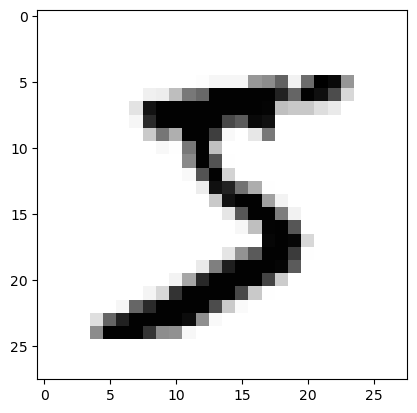

In [5]:
_ = plt.imshow(X_train[0], cmap="Greys")

In [6]:
# Reshape the image data in 2D format
X_train = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1, X_test.shape[1]*X_test.shape[2])

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Buidling a Classifier using Support Vector Machine

In [8]:
clf_svm = make_pipeline(
    StandardScaler(), 
    SVC(gamma=0.001, C=100)
)

In [9]:
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.001))])

In [10]:
y_pred_svm = clf_svm.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.98      0.98       958
           7       0.95      0.97      0.96      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [12]:
print(confusion_matrix(y_test, y_pred_svm))

[[ 968    0    3    3    1    2    1    1    1    0]
 [   1 1126    3    0    0    1    2    1    1    0]
 [   6    3 1000    1    2    0    1   12    6    1]
 [   0    0    3  984    0    7    0    6    8    2]
 [   0    0    6    0  952    1    4    7    2   10]
 [   3    1    1    8    3  860    5    5    5    1]
 [   5    2    1    0    2    9  935    2    2    0]
 [   0    7   10    2    2    0    0  997    0   10]
 [   3    2    4    6    4    9    2    8  931    5]
 [   1    5    2    8   10    4    0   12    3  964]]


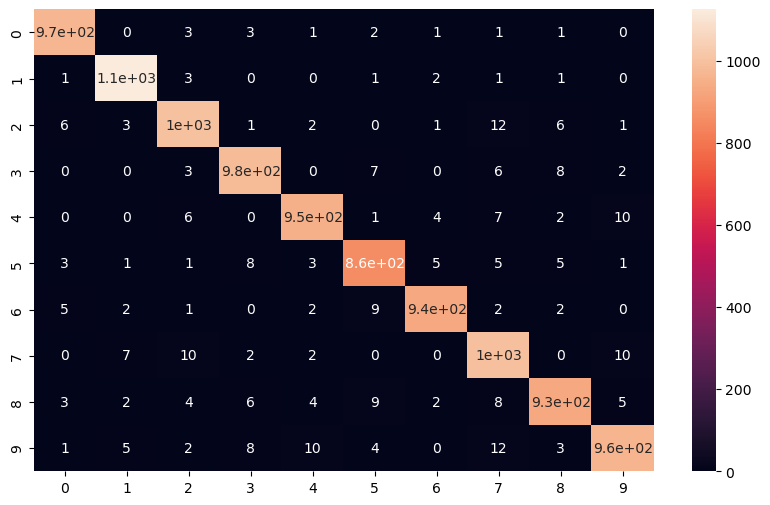

In [13]:
plt.figure(figsize=(10,6))
_ = sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True)

# Building a Classifier using Stochastic Gradient Descent

In [14]:
clf_sgd = make_pipeline(
    StandardScaler(),
    SGDClassifier()
)

In [15]:
clf_sgd.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [16]:
y_pred_sgd = clf_sgd.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.98      0.96      0.97      1135
           2       0.94      0.86      0.90      1032
           3       0.92      0.87      0.89      1010
           4       0.94      0.89      0.91       982
           5       0.91      0.79      0.85       892
           6       0.94      0.92      0.93       958
           7       0.95      0.90      0.92      1028
           8       0.60      0.93      0.73       974
           9       0.92      0.84      0.88      1009

    accuracy                           0.89     10000
   macro avg       0.91      0.89      0.90     10000
weighted avg       0.91      0.89      0.90     10000



In [18]:
confusion_matrix(y_test, y_pred_sgd)

array([[ 937,    0,    0,    0,    0,    3,    4,    1,   35,    0],
       [   0, 1086,    5,    1,    0,    2,    4,    0,   37,    0],
       [   3,    3,  892,   13,    7,    1,   13,    6,   90,    4],
       [   4,    0,   13,  874,    0,   20,    2,    7,   82,    8],
       [   1,    0,    6,    0,  876,    1,    6,    4,   67,   21],
       [   5,    2,    1,   32,   10,  706,   15,    7,  106,    8],
       [   9,    2,    9,    0,    8,   13,  883,    1,   33,    0],
       [   2,    2,   16,    5,    5,    1,    0,  924,   49,   24],
       [   7,    4,    4,   15,    3,   22,    8,    1,  906,    4],
       [   5,    5,    0,    6,   24,    4,    0,   20,  100,  845]])

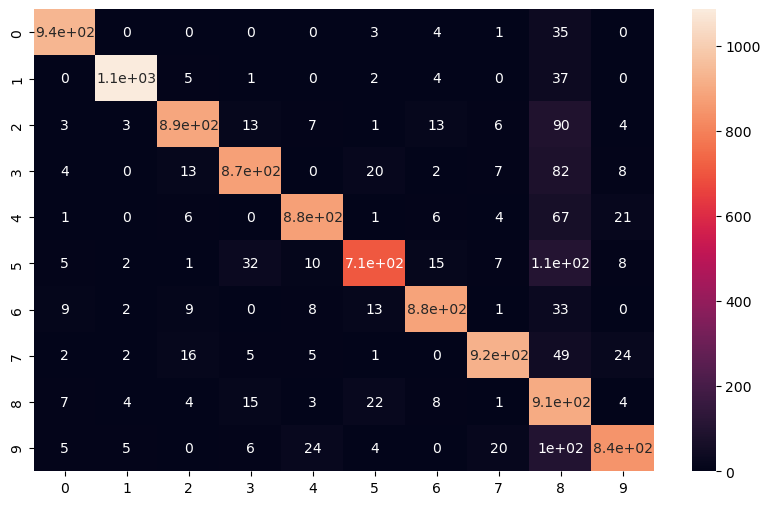

In [19]:
plt.figure(figsize=(10,6))
_ = sns.heatmap(confusion_matrix(y_test, y_pred_sgd), annot=True)

# Building a Classifier using Decision Trees

In [33]:
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

In [21]:
tree_params = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : list(range(5, 25, 5))
}

In [22]:
cv = KFold(n_splits=5, shuffle=True)

In [23]:
clf_tree = DecisionTreeClassifier()
clf_tree_search = GridSearchCV(clf_tree, tree_params, cv=cv, n_jobs=-1)

In [24]:
clf_tree_search.fit(X_train, y_train)

/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20]})

In [25]:
print(clf_tree_search.best_estimator_)
print(clf_tree_search.best_params_)

DecisionTreeClassifier(criterion='entropy', max_depth=15)
{'criterion': 'entropy', 'max_depth': 15}


In [26]:
clf_tree.set_params(**clf_tree_search.best_params_)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [27]:
y_pred_tree = clf_tree.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       980
           1       0.96      0.97      0.97      1135
           2       0.86      0.89      0.87      1032
           3       0.86      0.85      0.86      1010
           4       0.88      0.87      0.88       982
           5       0.83      0.85      0.84       892
           6       0.91      0.90      0.90       958
           7       0.91      0.89      0.90      1028
           8       0.86      0.84      0.85       974
           9       0.86      0.87      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [29]:
print(confusion_matrix(y_test, y_pred_tree))

[[ 914    2    7    3    2   22    8    5    8    9]
 [   1 1104    6    3    0    6    2    4    7    2]
 [  10    5  917   15   10   17   18   15   20    5]
 [   9    8   29  859    6   38    7   18   19   17]
 [   7    5   20    9  853    8   14   12   17   37]
 [  11    4    7   38    7  761   17    4   21   22]
 [  14    3   12    5   20   20  861    6   12    5]
 [   3    9   40   16   12    7    2  910    6   23]
 [   9    6   20   32   18   22   14   12  815   26]
 [   6    4    6   18   36   21    5   14   25  874]]


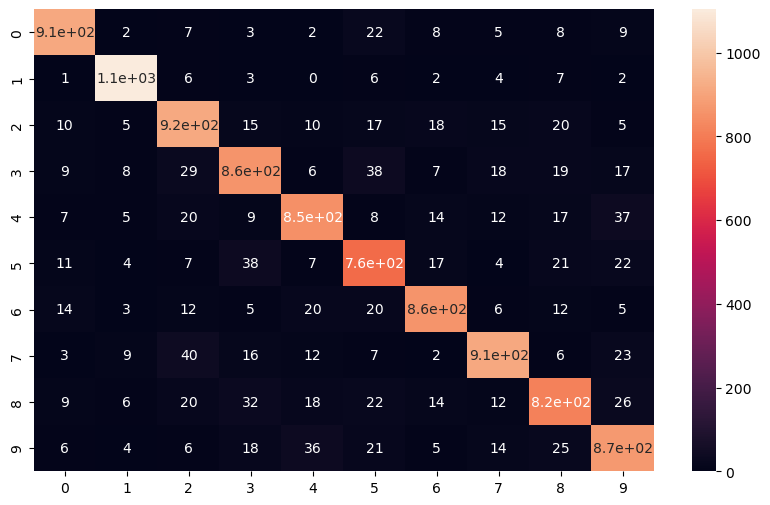

In [30]:
plt.figure(figsize=(10, 6))
_ = sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True)

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

In [32]:
extra_tree_params = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "n_estimators" : list(range(5, 50, 5)),
    "max_depth" : list(range(5, 25, 5)),
    "bootstrap" : [True, False]
}

In [34]:
clf_extra_tree = ExtraTreesClassifier()
clf_extra_tree_search = RandomizedSearchCV(clf_extra_tree, 
                                           extra_tree_params, 
                                           cv=cv, 
                                           n_jobs=-1,
                                           n_iter=15
                        )

In [35]:
clf_extra_tree_search.fit(X_train, y_train)

/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=ExtraTreesClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [5, 10, 15, 20]})

In [36]:
print(clf_extra_tree_search.best_estimator_)
print(clf_extra_tree_search.best_params_)

ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=15,
                     n_estimators=20)
{'n_estimators': 20, 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': True}


In [37]:
clf_extra_tree.set_params(**clf_extra_tree_search.best_params_)
clf_extra_tree.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=15,
                     n_estimators=20)

In [38]:
y_pred_extra_tree = clf_extra_tree.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred_extra_tree))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.94      0.95      1032
           3       0.94      0.94      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.94      0.94      0.94       892
           6       0.96      0.97      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.95      0.94      0.94       974
           9       0.92      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [40]:
print(confusion_matrix(y_test, y_pred_extra_tree))

[[ 964    0    1    0    0    3    5    1    4    2]
 [   0 1124    2    5    1    0    1    0    2    0]
 [   7    1  971   10    8    2    8   15    8    2]
 [   0    0   11  949    0   21    1   10   12    6]
 [   0    1    1    0  931    1    8    0    5   35]
 [   5    0    2   21    4  837   11    2    7    3]
 [   7    4    2    0    4    8  928    0    5    0]
 [   1    7   21    3    2    0    1  972    3   18]
 [   4    1    8   13    9    8    4    3  913   11]
 [   9    6    2    9   16    7    2    9    7  942]]


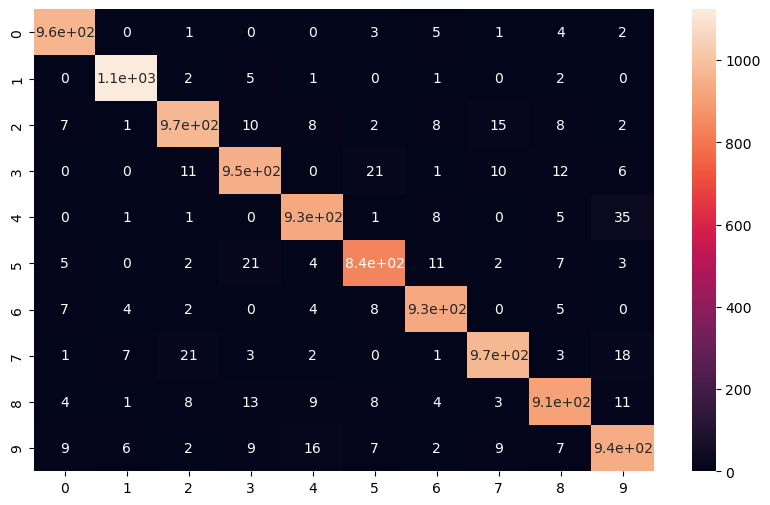

In [41]:
plt.figure(figsize=(10,6))

_ = sns.heatmap(confusion_matrix(y_test, y_pred_extra_tree), annot=True)

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
adaboost_params = {
    "n_estimators" : list(range(5, 100, 5)),
    "learning_rate" : [0.001, 0.01, 0.1, 1.0]
}

In [44]:
clf_adaboost = AdaBoostClassifier()

clf_adaboost_search = RandomizedSearchCV(clf_adaboost, adaboost_params, cv=cv, n_jobs=-1, n_iter=10)

In [45]:
clf_adaboost_search.fit(X_train, y_train)

/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=AdaBoostClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          1.0],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 55, 60,
                                                         65, 70, 75, 80, 85, 90,
                                                         95]})

In [46]:
print(clf_adaboost_search.best_estimator_)
print(clf_adaboost_search.best_params_)

AdaBoostClassifier(learning_rate=0.1, n_estimators=90)
{'n_estimators': 90, 'learning_rate': 0.1}


In [47]:
clf_adaboost.set_params(**clf_adaboost_search.best_params_)
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=90)

In [48]:
y_pred_adaboost = clf_adaboost.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91       980
           1       0.91      0.92      0.92      1135
           2       0.75      0.74      0.74      1032
           3       0.75      0.79      0.77      1010
           4       0.79      0.74      0.76       982
           5       0.66      0.65      0.65       892
           6       0.92      0.73      0.81       958
           7       0.88      0.77      0.82      1028
           8       0.66      0.82      0.73       974
           9       0.69      0.83      0.75      1009

    accuracy                           0.79     10000
   macro avg       0.80      0.78      0.79     10000
weighted avg       0.80      0.79      0.79     10000



In [50]:
print(confusion_matrix(y_test, y_pred_adaboost))

[[ 856    0   16   15    2   68    8    6    8    1]
 [   0 1042   46    8    0    4    2    1   32    0]
 [   4   31  764   27   13   21   17   23  124    8]
 [   7   12   24  793    2   68    6   20   60   18]
 [   2    0   10    1  722   20    8   20   31  168]
 [  15   13   12  145   18  581   10    9   68   21]
 [  18    7   75    3   60   58  699    4   34    0]
 [   0   17   40    3   18    4    0  792   24  130]
 [   5   12   16   52    9   41   10    3  794   32]
 [   4    6   17   15   65   18    2   19   26  837]]


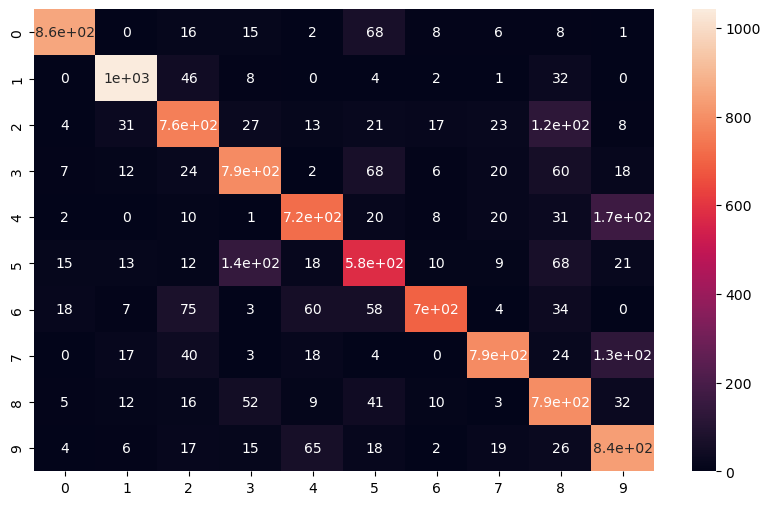

In [53]:
plt.figure(figsize=(10,6))

_ = sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True)

# Ensemble Voting Method

In [55]:
from sklearn.ensemble import VotingClassifier

In [56]:
vreg = VotingClassifier(
    estimators=[
        ("svm", clf_svm),
        ("sgd", clf_sgd),
        ("DTree", clf_tree),
        ("ExtraDTree", clf_extra_tree),
        # ("AdaBoost", clf_adaboost),
    ],
    n_jobs=-1,
)

In [57]:
vreg.fit(X_train, y_train)

/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  

VotingClassifier(estimators=[('svm',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=100, gamma=0.001))])),
                             ('sgd',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('sgdclassifier',
                                               SGDClassifier())])),
                             ('DTree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=15)),
                             ('ExtraDTree',
                              ExtraTreesClassifier(bootstrap=True,
                                                   criterion='entropy',
                                     

In [58]:
y_pred = vreg.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.94      0.95      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [60]:
print(confusion_matrix(y_test, y_pred))

[[ 969    0    0    0    0    2    3    1    5    0]
 [   0 1124    2    1    0    2    4    1    1    0]
 [   5    2 1000    2    2    1    5    6    8    1]
 [   0    0   11  975    0    3    0    6   11    4]
 [   1    0    8    0  956    0    4    1    2   10]
 [   4    4    1   16    2  849    6    2    8    0]
 [  12    3    1    0    4    8  925    0    5    0]
 [   1    8   21    4    4    0    0  978    2   10]
 [   5    0    6    8    6   11    8    2  926    2]
 [   7    5    1   13   13    4    1   12   14  939]]


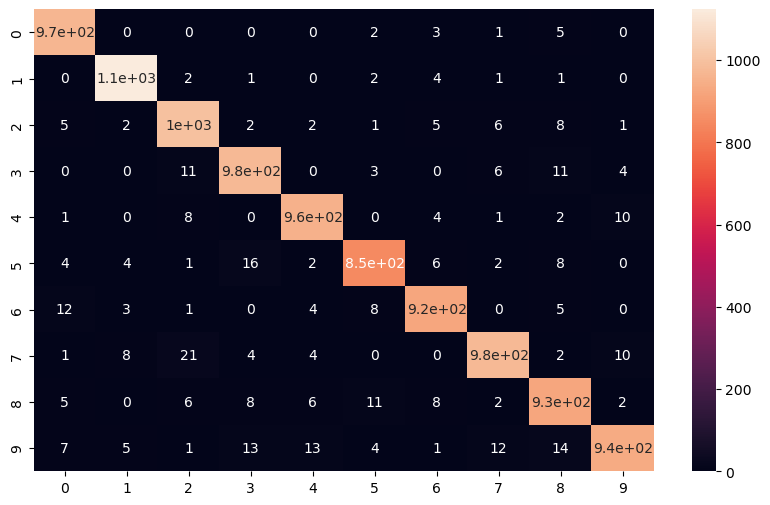

In [62]:
plt.figure(figsize=(10,6))

_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)